# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Saya mulai dengan mengimpor library-library yang diperlukan: pandas dan numpy untuk manipulasi data, seaborn dan matplotlib untuk visualisasi, serta berbagai modul dari sklearn untuk tugas-tugas machine learning seperti pembagian data, pra-pemrosesan, pemodelan dengan Decision Tree dan Random Forest, hyperparameter tuning, dan evaluasi performa model.

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('/content/data_clustering_inverse.csv')
df

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,Sangat Kecil,Debit,ATM,Doctor,23108.623090,412453.106776,2.108105,7.768070e+10,4
1,Besar,Debit,ATM,Doctor,22472.352259,711623.377281,2.108105,2.090349e+11,0
2,Kecil,Debit,Online,Student,6883.716893,287798.827398,2.108105,1.706971e+10,1
3,Sedang,Debit,Online,Student,9110.664802,133227.520970,2.108105,1.301946e+11,5
4,Kecil,Debit,ATM,Student,6565.581477,866194.683709,2.108105,1.189450e+10,1
...,...,...,...,...,...,...,...,...,...
2313,Sedang,Debit,Branch,Doctor,16109.643946,891125.539585,2.108105,3.889773e+09,4
2314,Sangat Kecil,Debit,Branch,Retired,18654.727271,736554.233157,2.108105,5.141046e+10,4
2315,Sedang,Debit,Online,Student,8156.258555,103310.493920,2.108105,2.701330e+10,5
2316,Sedang,Credit,Online,Student,8474.393971,472287.160877,2.108105,2.013652e+09,5


 sekarang saya membaca file CSV dan menyimpannya dalam DataFrame bernama df. Dengan langsung memanggil df, saya melihat struktur data yang terdiri dari 2318 baris dan 9 kolom, termasuk fitur seperti TransactionAmount dan kolom Target.

In [3]:
df.head(5)

,TransactionAmount,TransactionType,Channel,CustomerOccupation,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Target
0,Sangat Kecil,Debit,ATM,Doctor,23108.623090,412453.106776,2.108105,7.768070e+10,4
1,Besar,Debit,ATM,Doctor,22472.352259,711623.377281,2.108105,2.090349e+11,0
2,Kecil,Debit,Online,Student,6883.716893,287798.827398,2.108105,1.706971e+10,1
3,Sedang,Debit,Online,Student,9110.664802,133227.520970,2.108105,1.301946e+11,5
4,Kecil,Debit,ATM,Student,6565.581477,866194.683709,2.108105,1.189450e+10,1


untuk melihat cuplikan data lebih detail, khususnya beberapa baris pertama, saya menjalankan df.head(5). Perintah ini menampilkan lima baris teratas dari DataFrame df saya. Seperti yang terlihat pada gambar, ini memungkinkan saya untuk memeriksa dengan cepat nama-nama kolom seperti TransactionAmount, TransactionType, Channel, CustomerOccupation, hingga Target, beserta contoh-contoh data di dalamnya.

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
from types import TracebackType
TransactionTypeEncoder = LabelEncoder()
ChannelEncoder = LabelEncoder()
CustomerOccupationEncoder = LabelEncoder()
LoginAttemptsEncoder = LabelEncoder()
TransactionAmountEncoder = LabelEncoder()
df['TransactionType'] = TransactionTypeEncoder.fit_transform(df['TransactionType'])
df['TransactionAmount'] = TransactionAmountEncoder.fit_transform(df['TransactionAmount'])
df['LoginAttempts'] = LoginAttemptsEncoder.fit_transform(df['LoginAttempts'])
df['Channel'] = ChannelEncoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = CustomerOccupationEncoder.fit_transform(df['CustomerOccupation'])

sekarang saya akan mengubah kolom-kolom teks seperti TransactionType, TransactionAmount, LoginAttempts, Channel, dan CustomerOccupation menjadi representasi numerik. Untuk ini, saya menggunakan LabelEncoder, membuat encoder terpisah untuk setiap kolom, lalu menerapkan fit_transform untuk mengganti nilai-nilai teks di kolom tersebut dengan angka.


Sumber


In [5]:
minmax_scaler = MinMaxScaler()

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

 selanjutnya saya akan menormalkan semua kolom numerik menggunakan MinMaxScaler. Saya membuat objek MinMaxScaler, lalu memilih kolom-kolom bertipe int64 atau float64, dan kemudian menerapkan fit_transform pada kolom-kolom tersebut untuk mengubah skala nilainya menjadi antara 0 dan 1.

In [6]:
df['Target'] = df['Target'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2318 non-null   float64
 1   TransactionType      2318 non-null   float64
 2   Channel              2318 non-null   float64
 3   CustomerOccupation   2318 non-null   float64
 4   CustomerAge          2318 non-null   float64
 5   TransactionDuration  2318 non-null   float64
 6   LoginAttempts        2318 non-null   float64
 7   AccountBalance       2318 non-null   float64
 8   Target               2318 non-null   object 
dtypes: float64(8), object(1)
memory usage: 163.1+ KB


saya mengubah kolom 'Target' menjadi tipe data string, lalu menggunakan df.info() untuk melihat ringkasan DataFrame. Outputnya (seperti pada gambar) mengonfirmasi bahwa 'Target' kini bertipe 'object' dan 8 kolom fitur lainnya adalah float64, tanpa ada nilai yang hilang.

In [7]:
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


saya memisahkan DataFrame menjadi fitur X (semua kolom kecuali 'Target') dan target y. Kemudian, saya menggunakan train_test_split untuk membaginya menjadi data latih (X_train, y_train) dan data uji (X_test, y_test) dengan proporsi 80% latih dan 20% uji, menggunakan random_state=42 agar pembagiannya konsisten.

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [8]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

Baik, saya membuat model Decision Tree Classifier dan langsung melatihnya (.fit()) menggunakan data latih X_train dan y_train.

==== Decision Tree Classifier ====

Classification Report:
                    precision    recall  f1-score   support

               0.0       1.00      1.00      1.00       352
               0.2       1.00      1.00      1.00       285
               0.4       1.00      1.00      1.00       437
0.6000000000000001       1.00      1.00      1.00        68
               0.8       1.00      1.00      1.00       533
               1.0       1.00      1.00      1.00       179

          accuracy                           1.00      1854
         macro avg       1.00      1.00      1.00      1854
      weighted avg       1.00      1.00      1.00      1854



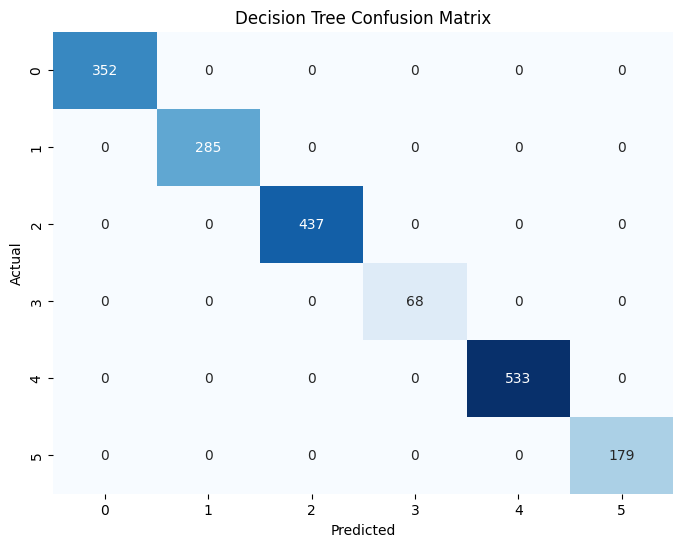

----------------------------------------------------------------------------------------------------



In [9]:
y_pred = dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

print("==== Decision Tree Classifier ====")
print("\nClassification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("-" * 100 + "\n")

saya mengevaluasi model Decision Tree pada data latih. Saya membuat prediksi pada X_train, lalu menghasilkan classification report dan confusion matrix. Hasil cetak classification report (seperti pada gambar) dan visualisasi heatmap dari confusion matrix (juga terlihat di gambar) menunjukkan performa yang sempurna (akurasi, presisi, recall, f1-score 1.00) karena semua prediksi pada data latih tepat sesuai dengan nilai aktualnya.

In [10]:
import joblib
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

Agar model Decision Tree yang sudah saya latih (dt) bisa digunakan kembali di masa mendatang tanpa perlu melatih ulang, saya akan menyimpannya ke dalam sebuah file.

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [11]:
rf = RandomForestClassifier().fit(X_train, y_train)

 sekarang saya akan mencoba model klasifikasi lain, yaitu Random Forest, untuk melihat akan seperti apakah hasilnya nanti.

==== Random Forest Classifier ====

Classification Report:
                    precision    recall  f1-score   support

               0.0       1.00      1.00      1.00       352
               0.2       1.00      1.00      1.00       285
               0.4       1.00      1.00      1.00       437
0.6000000000000001       1.00      1.00      1.00        68
               0.8       1.00      1.00      1.00       533
               1.0       1.00      1.00      1.00       179

          accuracy                           1.00      1854
         macro avg       1.00      1.00      1.00      1854
      weighted avg       1.00      1.00      1.00      1854



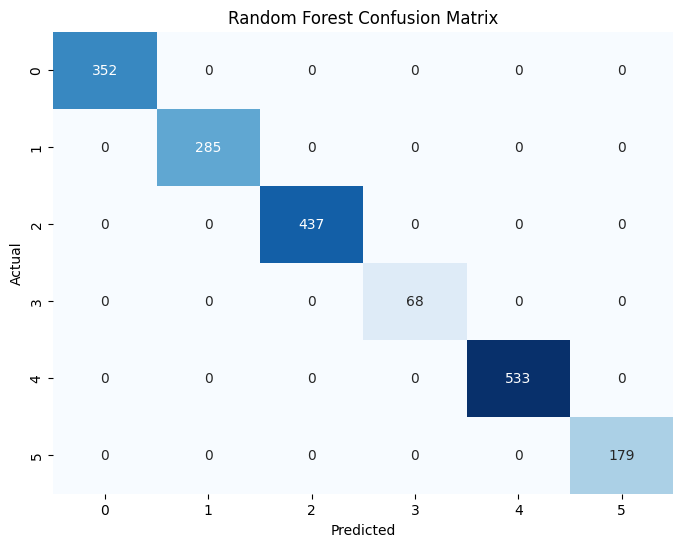

----------------------------------------------------------------------------------------------------



In [12]:
y_pred = rf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
report = classification_report(y_train, y_pred)

print("==== Random Forest Classifier ====")
print("\nClassification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("-" * 100 + "\n")

saya mengevaluasi model Random Forest pada data latih. Saya membuat prediksi, lalu menghasilkan classification report dan confusion matrix. Hasil cetak classification report dan visualisasi heatmap (seperti pada gambar) kembali menunjukkan performa sempurna pada data latih, dengan semua metrik (akurasi, presisi, recall, f1-score) bernilai 1.00, karena semua prediksi tepat.

In [13]:
import joblib
joblib.dump(rf, 'explore_randomforest_classification.h5')

['explore_randomforest_classification.h5']

Sama seperti model sebelumnya, agar model Random Forest yang sudah saya latih (rf) ini bisa saya gunakan lagi nanti, saya akan menyimpannya.

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Parameter terbaik untuk Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}

==== Evaluasi Decision Tree (Tuned) pada Data Training ====

Classification Report (Data Training):
                    precision    recall  f1-score   support

               0.0       0.99      0.99      0.99       352
               0.2       1.00      1.00      1.00       285
               0.4       0.99      0.99      0.99       437
0.6000000000000001       1.00      1.00      1.00        68
               0.8       1.00      1.00      1.00       533
               1.0       1.00      1.00      1.00       179

          accuracy                           1.00      1854
         macro avg       1.00      1.00      1.00      1854
      weighted avg       1.00      1.00      1.00      1854



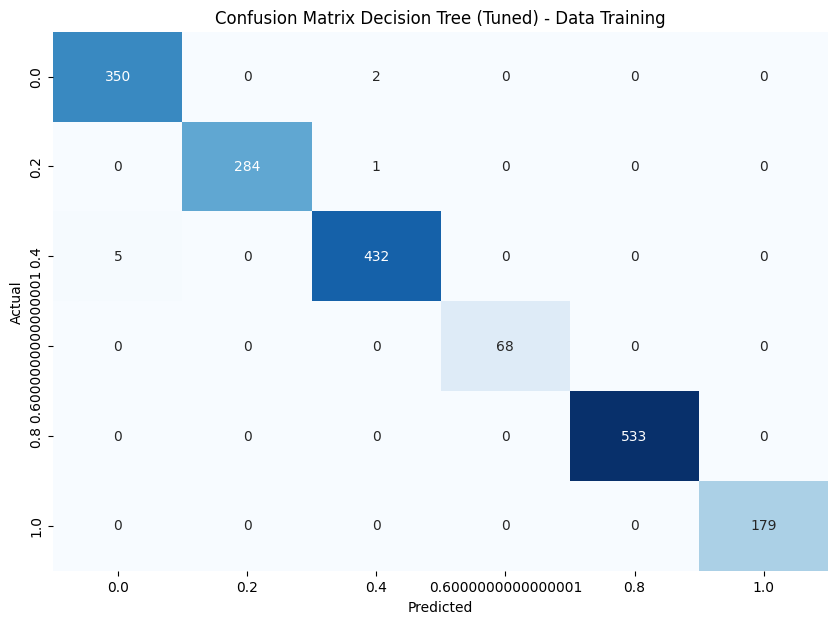


==== Evaluasi Decision Tree (Tuned) pada Data Test ====

Classification Report (Data Test):
                    precision    recall  f1-score   support

               0.0       0.96      0.98      0.97        93
               0.2       1.00      1.00      1.00        74
               0.4       0.98      0.96      0.97       107
0.6000000000000001       1.00      1.00      1.00        16
               0.8       1.00      1.00      1.00       115
               1.0       1.00      1.00      1.00        59

          accuracy                           0.99       464
         macro avg       0.99      0.99      0.99       464
      weighted avg       0.99      0.99      0.99       464



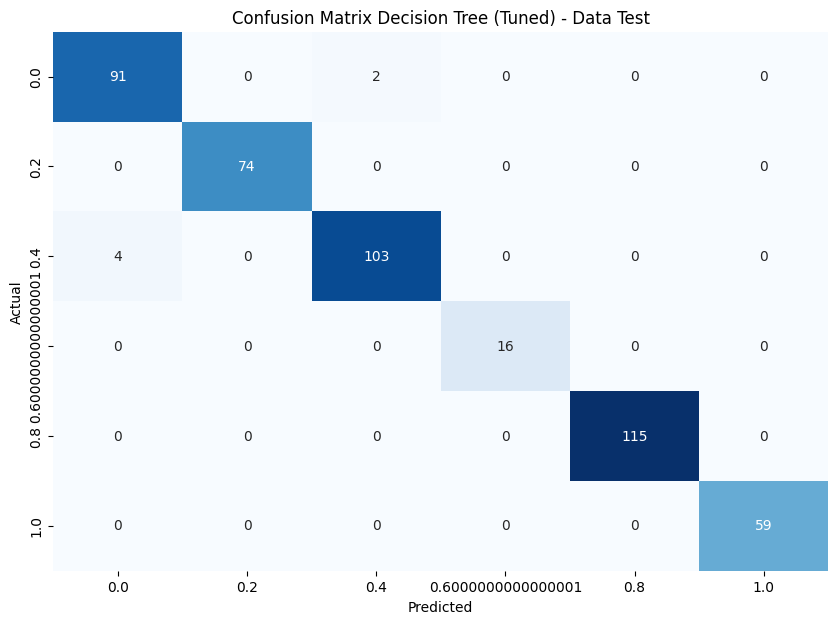

In [14]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5,
                              n_jobs=-1,
                              verbose=1,
                              scoring='accuracy')

dt_grid_search.fit(X_train, y_train)

best_params_dt = dt_grid_search.best_params_
print(f"Parameter terbaik untuk Decision Tree: {best_params_dt}")

tuned_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)
tuned_dt.fit(X_train, y_train)

y_pred_train_dt_tuned = tuned_dt.predict(X_train)
y_pred_test_dt_tuned = tuned_dt.predict(X_test)

print("\n==== Evaluasi Decision Tree (Tuned) pada Data Training ====")
cm_train_dt_tuned = confusion_matrix(y_train, y_pred_train_dt_tuned)
report_train_dt_tuned = classification_report(y_train, y_pred_train_dt_tuned)
print("\nClassification Report (Data Training):")
print(report_train_dt_tuned)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train_dt_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=tuned_dt.classes_, yticklabels=tuned_dt.classes_)
plt.title('Confusion Matrix Decision Tree (Tuned) - Data Training')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n==== Evaluasi Decision Tree (Tuned) pada Data Test ====")
cm_test_dt_tuned = confusion_matrix(y_test, y_pred_test_dt_tuned)
report_test_dt_tuned = classification_report(y_test, y_pred_test_dt_tuned)
print("\nClassification Report (Data Test):")
print(report_test_dt_tuned)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_dt_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=tuned_dt.classes_, yticklabels=tuned_dt.classes_)
plt.title('Confusion Matrix Decision Tree (Tuned) - Data Test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Untuk optimasi Decision Tree, saya menggunakan GridSearchCV dengan berbagai kombinasi hyperparameter (criterion, max_depth, dll.) dan validasi silang 5-fold untuk menemukan setelan terbaik berdasarkan akurasi. Model DecisionTreeClassifier kemudian dilatih ulang menggunakan parameter optimal ini.

Hasil evaluasi menunjukkan bahwa model yang telah di-tuning mencapai akurasi hampir sempurna (0.99) pada data latih, sedikit di bawah model awal yang 1.00, dengan beberapa misklasifikasi minor seperti terlihat pada classification report dan confusion matrix. Pada data uji, model yang di-tuning ini juga mencapai akurasi 0.99. Penurunan kecil pada performa data latih setelah tuning adalah hal yang diharapkan dan seringkali positif, karena ini mengindikasikan model menjadi kurang kompleks dan berpotensi mengurangi overfitting yang mungkin terjadi pada model awal.


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Parameter terbaik untuk Random Forest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

==== Evaluasi Random Forest (Tuned) pada Data Training ====

Classification Report (Data Training):
                    precision    recall  f1-score   support

               0.0       1.00      1.00      1.00       352
               0.2       1.00      1.00      1.00       285
               0.4       1.00      1.00      1.00       437
0.6000000000000001       1.00      1.00      1.00        68
               0.8       1.00      1.00      1.00       533
               1.0       1.00      1.00      1.00       179

          accuracy                           1.00      1854
         macro avg       1.00      1.00      1.00      1854
      weighted avg       1.00      1.00      1.00      1854



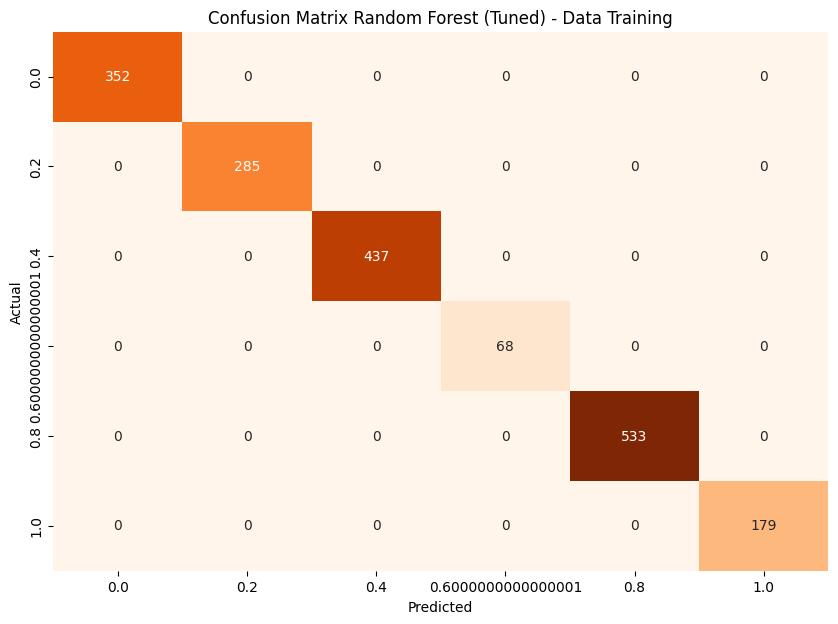


==== Evaluasi Random Forest (Tuned) pada Data Test ====

Classification Report (Data Test):
                    precision    recall  f1-score   support

               0.0       0.99      0.95      0.97        93
               0.2       1.00      1.00      1.00        74
               0.4       0.96      0.99      0.98       107
0.6000000000000001       1.00      1.00      1.00        16
               0.8       0.99      1.00      1.00       115
               1.0       1.00      1.00      1.00        59

          accuracy                           0.99       464
         macro avg       0.99      0.99      0.99       464
      weighted avg       0.99      0.99      0.99       464



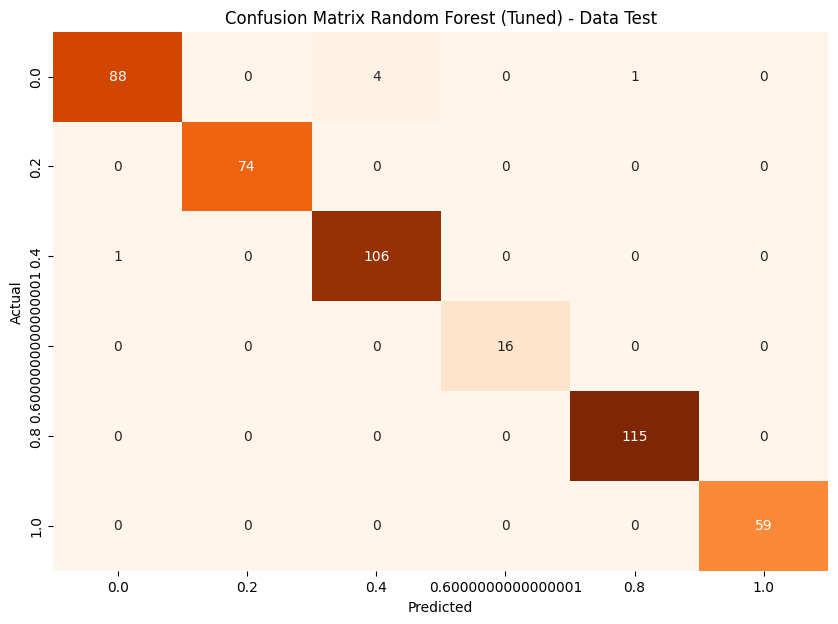

In [15]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=1,
                              scoring='accuracy')


rf_grid_search.fit(X_train, y_train)


best_params_rf = rf_grid_search.best_params_
print(f"Parameter terbaik untuk Random Forest: {best_params_rf}")


tuned_rf = RandomForestClassifier(**best_params_rf, random_state=42)
tuned_rf.fit(X_train, y_train)


y_pred_train_rf_tuned = tuned_rf.predict(X_train)
y_pred_test_rf_tuned = tuned_rf.predict(X_test)


print("\n==== Evaluasi Random Forest (Tuned) pada Data Training ====")
cm_train_rf_tuned = confusion_matrix(y_train, y_pred_train_rf_tuned)
report_train_rf_tuned = classification_report(y_train, y_pred_train_rf_tuned)
print("\nClassification Report (Data Training):")
print(report_train_rf_tuned)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_train_rf_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=tuned_rf.classes_, yticklabels=tuned_rf.classes_)
plt.title('Confusion Matrix Random Forest (Tuned) - Data Training')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\n==== Evaluasi Random Forest (Tuned) pada Data Test ====")
cm_test_rf_tuned = confusion_matrix(y_test, y_pred_test_rf_tuned)
report_test_rf_tuned = classification_report(y_test, y_pred_test_rf_tuned)
print("\nClassification Report (Data Test):")
print(report_test_rf_tuned)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rf_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=tuned_rf.classes_, yticklabels=tuned_rf.classes_)
plt.title('Confusion Matrix Random Forest (Tuned) - Data Test')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

saya melakukan hyperparameter tuning untuk Random Forest menggunakan GridSearchCV dengan berbagai parameter seperti n_estimators dan max_depth, menggunakan validasi silang 3-fold. Setelah menemukan parameter terbaik, saya melatih ulang model Random Forest (tuned_rf). Kemudian, saya akan mengevaluasi performa model yang sudah di-tuning ini pada data latih dan data uji menggunakan classification report dan confusion matrix. Jika model Random Forest awal (sebelum tuning) sudah memberikan akurasi yang sangat tinggi pada data uji dan tidak overfit, maka proses tuning yang ekstensif mungkin tidak diperlukan, terutama jika hasilnya justru menurunkan akurasi pada data uji, karena bisa jadi parameter default sudah cukup optimal atau proses tuning mengarah pada solusi yang kurang general.

In [16]:
import joblib
joblib.dump(tuned_rf, 'tuning_rf_classification.h5')

['tuning_rf_classification.h5']

Untuk menyimpan model Random Forest yang sudah di-tuning, saya menggunakan joblib.dump(tuned_rf, 'tuning_rf_classification.h5'). Ini akan menyimpan objek model tuned_rf ke dalam file tuning_rf_classification.h5.

In [17]:
import joblib
joblib.dump(tuned_dt, 'tuning_dt_classification.h5')

['tuning_dt_classification.h5']

Selanjutnya, untuk model Decision Tree yang juga sudah di-tuning, saya menggunakan perintah joblib.dump(tuned_dt, 'tuning_dt_classification.h5') untuk menyimpan objek model tuned_dt ke file tuning_dt_classification.h5.